In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pickle
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

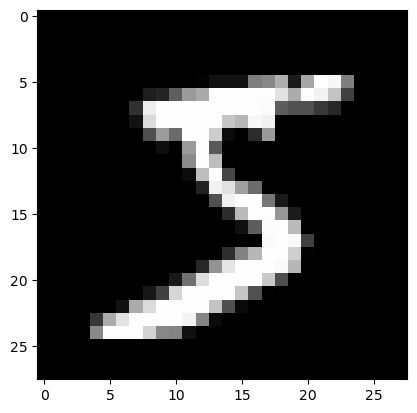

In [6]:
plt.imshow(X_train[0],cmap = 'gray')

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test.shape

(10000, 784)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
model = Sequential()

# model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,input_shape=(784,),activation='relu',name = 'hidden_layer'))
model.add(Dense(10,activation='softmax',name = 'output_layer'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')


2025-01-22 23:42:31.453619: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-01-22 23:42:31.454818: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-22 23:42:31.468134: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_split=0.2)

2025-01-22 23:42:32.174149: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2025-01-22 23:42:32.181440: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1996345000 Hz


Epoch 1/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.4860 - accuracy: 0.8608 - val_loss: 0.1577 - val_accuracy: 0.9542
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1379 - accuracy: 0.9603 - val_loss: 0.1181 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.1014 - val_accuracy: 0.9689
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0620 - accuracy: 0.9814 - val_loss: 0.0924 - val_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0472 - accuracy: 0.9871 - val_loss: 0.0985 - val_accuracy: 0.9701
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.0878 - val_accuracy: 0.9740
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.0800 - 

In [ ]:
y_prob = model.predict(X_test)

In [ ]:
y_prob

In [ ]:
y_pred = y_prob.argmax(axis = 1)

In [ ]:
y_pred

In [ ]:
# y_pred = model.predict(X_test[0].reshape(1,28*28)).argmax(axis = 1)

In [ ]:
plt.imshow(X_test[1].reshape(28,28),cmap = 'gray')

In [ ]:
y_pred[1]

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train)

In [ ]:
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Loss: {loss:.3f}")

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
model.save('model.h5')
print("Model saved as model.h5")